# __Task 1__

Напишите функцию smart_test, которая получает на вход dataframe с двумя номинативными переменными с произвольным числом градаций. Функция должна проверять гипотезу о независимости этих двух переменных при помощи критерия хи - квадрат или точного критерия Фишера.

Если хотя бы в одной ячейке таблицы сопряженности двух переменных меньше 5 наблюдений, функция должна рассчитывать точный критерий Фишера и возвращать вектор из одного элемента: получившегося p - уровня значимости.

Если наблюдений достаточно для расчета хи-квадрат (во всех ячейках больше либо равно 5 наблюдений), тогда функция должна применять критерий хи-квадрат и возвращать вектор из трех элементов: значение хи-квадрат, число степеней свободы,  p-уровня значимости.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact, chi2_contingency, chisquare

In [4]:
fisher_exact?

In [6]:
chi2_contingency?

In [105]:
dataframe = pd.DataFrame([[1,3],[3,1]])
dataframe

,0,1
0,1,3
1,3,1


In [106]:
check = dataframe.any(axis=None)
check

True

In [107]:
oddsratio, p_value_Fisher = fisher_exact(dataframe)
p_value_Fisher

0.48571428571428527

In [108]:
chi_2, p_value_CHI, dof, expected = chi2_contingency(dataframe, correction=True)
p_value_CHI

0.47950012218695337

In [109]:
dataframe.gt(0)

,0,1
0,True,True
1,True,True


In [110]:
dataframe.gt(0).sum(axis=1).sum(axis=0)

4

In [111]:
dataframe.gt?

In [125]:
df_1 = pd.DataFrame([[1,3],[5,1]])
df_2 = pd.DataFrame([[5,5],[5,5]])

In [126]:
def smart_test(dataframe):
    if dataframe.ge(5).sum(axis=1).sum(axis=0) == 4:
        result = [item for item in chi2_contingency(dataframe)]
        return result[:len(result)-1]
    else:
        p_value = fisher_exact(dataframe)[1]
        return p_value

In [127]:
res_1 = smart_test(df_1)
res_1

0.19047619047619027

In [128]:
res_2 = smart_test(df_2)
res_2

[0.0, 1.0, 1]

# __Task 2__

Почувствуй себя биоинформатиком!  Вся наследственная информация в живых организмах хранится внутри молекулы ДНК. Эта молекула состоит из последовательности четырех "букв" — ﻿A, T, G и C. 

Напишите функцию most_significant, которая получает на вход dataframe с произвольным количеством переменных, где каждая переменная это нуклеотидная последовательность. 

Cкачайте тестовый набор данных (смотри ниже), чтобы познакомиться с их структурой, на которых будет тестироваться ваша функция. Рассмотрим пример, всего-лишь с несколькими наблюдениями, чтобы прояснить суть задачи:

In [131]:
pd.DataFrame?

In [182]:
df = pd.DataFrame([["A","T","C"],["G","A","A"],["C","C","C"],
                   ["T","G","A"],[ "A","A","A"],["A","A","G"]], columns=["V1","V2","V3"])
df

,V1,V2,V3
0,A,T,C
1,G,A,A
2,C,C,C
3,T,G,A
4,A,A,A
5,A,A,G


In [183]:
df.value_counts?

In [184]:
df.columns

Index(['V1', 'V2', 'V3'], dtype='object')

In [196]:
def most_significant(df):
    res = []
    for i, col in enumerate(df.columns):
        counts = df[col].value_counts() # count each letter
        stat, p = chisquare(counts) # get p-value
        res.append(("V"+str(i+1),"chi2 = " + str(stat), "p_value = " + str(p)))
    return res

In [197]:
print(df['V1'].value_counts(), df['V2'].value_counts(), df['V3'].value_counts())

A    3
T    1
G    1
C    1
Name: V1, dtype: int64 A    3
G    1
T    1
C    1
Name: V2, dtype: int64 A    3
C    2
G    1
Name: V3, dtype: int64


In [198]:
df['V2'].value_counts()

A    3
G    1
T    1
C    1
Name: V2, dtype: int64

In [199]:
chisquare(df['V2'].value_counts())

Power_divergenceResult(statistic=2.0, pvalue=0.5724067044708798)

In [200]:
most_significant(df)

[('V1', 'chi2 = 2.0', 'p_value = 0.5724067044708798'),
 ('V2', 'chi2 = 2.0', 'p_value = 0.5724067044708798'),
 ('V3', 'chi2 = 1.0', 'p_value = 0.6065306597126334')]

# __Task 3__

Создайте новую переменную important_cases - фактор с двумя градациями ("No" и "Yes"). Переменная должна принимать значение Yes, если для данного цветка значения хотя бы трех количественных переменных выше среднего. В противном случае переменная important_cases  будет принимать значение No.

Например, рассмотрим первую строчку данных iris:

In [301]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [364]:
# import some data to play with
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [469]:
iris_prop = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_prop["species"] = iris.target
iris_prop.species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [470]:
def species_creator(source, dataframe, species):
    for i in range(len(source.target_names)):
        dataframe.loc[dataframe[species] == i, species] = source.target_names[i]  
    return dataframe

In [471]:
iris_prop = species_creator(iris, iris_prop, "species")
iris_prop

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [472]:
def means_by_columns(dataframe):
    means = []
    for i, col in enumerate(dataframe.columns):
        if col == "species":
            return means
        means.append(np.mean(dataframe[col]))
    return means

In [480]:
iris_prop.iloc[:, :-2].sum(axis = 1)[0]

10.0

In [476]:
def important_cases(dataframe):
    newframe = dataframe.copy(deep=True)
    means = means_by_columns(dataframe)
    newframe["factor"] = 0
    
    for i, col in enumerate(newframe.columns[:-2]):
        newframe[col] = newframe[col].gt(means[i])
    
    for i in range(len(newframe)):
        if newframe.iloc[:, :-2].sum(axis = 1)[i] >= 3:
            newframe["factor"][i] = "Yes"
        else:
            newframe["factor"][i] = "No"
    
    return newframe.factor.value_counts()

In [477]:
iris_log = important_cases(iris_prop)
iris_log

<ipython-input-476-ac3d61b036fe>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newframe["factor"][i] = "No"
/home/tater/ML_coursera/ML/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-476-ac3d61b036fe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newframe["factor"][i] = "Yes"


No     81
Yes    69
Name: factor, dtype: int64

# __Task 4__

Обобщим предыдущую задачу! Напишем функцию get_important_cases, которая принимает на вход dataframe с произвольным числом количественных переменных (гарантируется хотя бы две переменные). Функция должна возвращать dataframe с новой переменной - фактором important_cases.

Переменная  important_cases принимает значение Yes, если для данного наблюдения больше половины количественных переменных имеют значения больше среднего. В противном случае переменная important_cases принимает значение No.

Переменная  important_cases - фактор с двумя уровнями 0 - "No", 1  - "Yes".  То есть даже если в каком-то из тестов все наблюдения получили значения "No", фактор должен иметь две градации. 

In [459]:
def means_by_columns(dataframe):
    means = []
    for i, col in enumerate(dataframe.columns):
        means.append(np.mean(dataframe[col]))
    return means

In [490]:
def get_important_cases(dataframe):
    means = means_by_columns(dataframe)
    dataframe["factor"] = 0
    
    
    for i, col in enumerate(dataframe.columns[:-1]):
        dataframe[col] = dataframe[col].gt(means[i])
    
    for i in range(len(dataframe)):
        if dataframe.iloc[:, :-1].sum(axis = 1)[i] > len(dataframe.columns[:-1]) / 2:
            dataframe["factor"][i] = "Yes"
        else:
            dataframe["factor"][i] = "No"
    
    return dataframe.factor.value_counts()

In [491]:
df_4 = pd.DataFrame([[16,17,25,20,16],[21,7,23,22,17],
                     [18,16,27,18,19]], 
                     columns=["V1","V2","V3","V4","V5"])
df_4

,V1,V2,V3,V4,V5
0,16,17,25,20,16
1,21,7,23,22,17
2,18,16,27,18,19


In [492]:
get_important_cases(df_4)

<ipython-input-490-1f392c5e973e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["factor"][i] = "No"
/home/tater/ML_coursera/ML/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-490-1f392c5e973e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["factor"][i] = "Yes"


No     2
Yes    1
Name: factor, dtype: int64

# __Task 5__

В R мы без труда можем рассчитать среднее и медиану вектора, а вот встроенной функции для расчета моды — наиболее часто встречаемого значения — в R нет! А мода так бы пригодилась нам при анализе номинативных данных! При этом функция mode в R существует, но выполняет абсолютно другую задачу (если хотите узнать, какую именно, ознакомьтесь со справкой: наберите в консоли ?mode).

Напишите функцию stat_mode, которая получает на вход вектор из чисел произвольной длины и возвращает числовой вектор с наиболее часто встречаемым значением. Если наиболее часто встречаемых значений несколько, функция должна возвращать несколько значений моды  в виде числового вектора. 

In [527]:
import collections

In [545]:
df = [1, 1, 1, 2 ,2,2, 3, 3, 3,5,6,9,8,8,8,8,8,5,6,2,1,0,1,4,52,2,9,6,5,4]

In [548]:
def stat_mode(dataframe):
# подсчет количества уникальных элементов в массиве
    freq = collections.Counter(dataframe)
    return [k for k, v in freq.items() if v == max(freq.values())]

In [549]:
stat_mode(df)

[1, 2, 8]

# __Task 6__

Доктор Пилюлькин решил вооружиться статистикой, чтобы сравнить эффективность трех лекарств! Давайте поможем ему и напишем функцию max_resid, которая получает на вход dataframe с двумя переменными: типом лекарства и результатом его применения. 

Drugs - фактор с тремя градациями: drug_1, drug_2, drug_3.     

Result - фактор с двумя градациями: positive, negative.

Функция должна находить ячейку таблицы сопряженности с максимальным  значением стандартизированного остатка и возвращать вектор из двух элементов: название строчки и столбца этой ячейки.

Для расчета стандартизированных остатков вы можете воспользоваться уже знакомой вам функцией chisq.test(). Изучите справку по этой функции, чтобы найти, где хранятся стандартизированные остатки.

In [555]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
df_c = pd.read_csv("https://stepic.org/media/attachments/course/524/test_drugs.csv")
df_c.head()

,Drugs,Result
0,drug_3,positive
1,drug_1,negative
2,drug_1,negative
3,drug_2,positive
4,drug_1,negative


In [571]:
df_c.iloc[:,0]

0      drug_3
1      drug_1
2      drug_1
3      drug_2
4      drug_1
        ...  
390    drug_3
391    drug_3
392    drug_2
393    drug_1
394    drug_2
Name: Drugs, Length: 395, dtype: object

In [572]:
df_c.iloc[:,1]

0      positive
1      negative
2      negative
3      positive
4      negative
         ...   
390    positive
391    positive
392    negative
393    negative
394    negative
Name: Result, Length: 395, dtype: object

In [557]:
cross_tab = pd.crosstab(df_c.iloc[:,0], df_c.iloc[:,1])
cross_tab

Result,negative,positive
Drugs,,
drug_1,31,61
drug_2,84,98
drug_3,55,66


In [573]:
chi2_contingency?

In [ ]:
def max_resid(df):
    cross_tab = pd.crosstab(df.iloc[:,0], df.iloc[:,1])
    chi, p, dof, exp = chi2_contingency(cross_tab)
    std_residuals = (exp - cross_tab) / np.sqrt(exp)
    
    # Looks clunky, but I can't come up with elegant solution
    max_element = std_residuals[std_residuals == np.max(std_residuals).max()].dropna(axis=1, how="all").dropna()
    return [max_element.index[0], max_element.columns[0]]

max_resid(df_c)

# __Task 7__

Ну и напоследок построим гистограмму частот при помощи ggplot2!
Основной способ визуализировать распределение частот номинативной переменной - гистограмма частот (барплот). Используя библиотеку ggplot2 и встроенные данные diamonds, постройте график распределения частот переменной color, на котором за цвет заполнения столбиков отвечает переменная cut. Сохраните код графика в переменную obj. В итоге должен получиться вот такой график.

In [576]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df = pd.read_csv('diamonds.csv')

In [577]:
df.color

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: object

In [578]:
df.cut

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object

In [585]:
# разобраться с кросстабом еще раз, понять, для чего используется вызов массивов
crosstab = pd.crosstab(df.color, df.cut)

In [596]:
crosstab[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]

cut,Fair,Good,Very Good,Premium,Ideal
color,,,,,
D,163,662,1513,1603,2834
E,224,933,2400,2337,3903
F,312,909,2164,2331,3826
G,314,871,2299,2924,4884
H,303,702,1824,2360,3115
I,175,522,1204,1428,2093
J,119,307,678,808,896


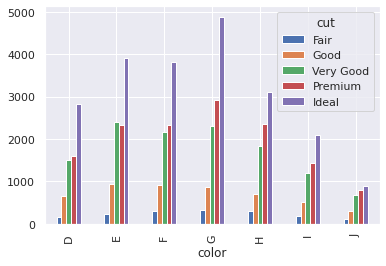

In [580]:
crosstab.plot(kind='bar')
plt.show()

In [560]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [569]:
crosstab = pd.crosstab(df.color, df.cut)[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]
crosstab

cut,Fair,Good,Very Good,Premium,Ideal
color,,,,,
D,163,662,1513,1603,2834
E,224,933,2400,2337,3903
F,312,909,2164,2331,3826
G,314,871,2299,2924,4884
H,303,702,1824,2360,3115
I,175,522,1204,1428,2093
J,119,307,678,808,896
